In [140]:
from IPython.display import HTML

HTML('''<style>.btnExample {
  color: #F9F9FF;
  background: #43D1AF;
  font-weight: bold;
  border: 1px solid #43D1AF;
}
 
.btnExample:hover {
  color: #43D1AF;
  background: #F9F9FF;
}</style><script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input class="btnExample" type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [141]:
from pyspark.sql import SQLContext

sqlContext = SQLContext(sc)

def make_vluchtelingen_dataset_all(line):
    all_vals = line.split(',')
    return [all_vals[0], all_vals[1], all_vals[2], all_vals[3], all_vals[4]]

allData = sc.textFile('./data/Vluchtelingen/DataEuropa.csv')
headerAll = allData.take(1)
allData_filtered = allData.filter(lambda l: 'Origin' not in l)
allData_df = allData_filtered.map(make_vluchtelingen_dataset_all).toDF()
allData_df.registerTempTable('allData')

#allData_df.show()

landen = sqlContext.sql('SELECT DISTINCT _1 FROM allData GROUP BY _1 ORDER BY _1')

countries = landen.map(lambda r: r[0]).collect()
#print countries

options = ''

for x in countries:
    options += """<option value='""" + str(x) + """'>""" + str(x) + """</option>"""

In [142]:
from IPython.display import HTML

input_form = """
<style type="text/css">
.form-style-6{
    font: 105% Arial, Helvetica, sans-serif;
    max-width: 400px;
    padding: 16px;
    background: #F7F7F7;
}
.form-style-6 h1{
    background: #43D1AF;
    padding: 20px 0;
    font-size: 150%;
    font-weight: 300;
    text-align: center;
    color: #fff;
    margin: -16px 0px 16px 0px;
}
.form-style-6 input[type="text"],
.form-style-6 input[type="date"],
.form-style-6 input[type="datetime"],
.form-style-6 input[type="email"],
.form-style-6 input[type="number"],
.form-style-6 input[type="search"],
.form-style-6 input[type="time"],
.form-style-6 input[type="url"],
.form-style-6 textarea,
.form-style-6 select 
{
    -webkit-transition: all 0.30s ease-in-out;
    -moz-transition: all 0.30s ease-in-out;
    -ms-transition: all 0.30s ease-in-out;
    -o-transition: all 0.30s ease-in-out;
    outline: none;
    box-sizing: border-box;
    -webkit-box-sizing: border-box;
    -moz-box-sizing: border-box;
    width: 100%;
    background: #fff;
    margin-bottom: 4%;
    border: 1px solid #ccc;
    padding: 3%;
    color: #555;
    font: 95% Arial, Helvetica, sans-serif;
}
.form-style-6 input[type="text"]:focus,
.form-style-6 input[type="date"]:focus,
.form-style-6 input[type="datetime"]:focus,
.form-style-6 input[type="email"]:focus,
.form-style-6 input[type="number"]:focus,
.form-style-6 input[type="search"]:focus,
.form-style-6 input[type="time"]:focus,
.form-style-6 input[type="url"]:focus,
.form-style-6 textarea:focus,
.form-style-6 select:focus
{
    box-shadow: 0 0 5px #43D1AF;
    padding: 3%;
    border: 1px solid #43D1AF;
}

.form-style-6 input[type="submit"],
.form-style-6 input[type="button"]{
    box-sizing: border-box;
    -webkit-box-sizing: border-box;
    -moz-box-sizing: border-box;
    width: 100%;
    padding: 3%;
    background: #43D1AF;
    border-bottom: 2px solid #30C29E;
    border-top-style: none;
    border-right-style: none;
    border-left-style: none;    
    color: #fff;
}
.form-style-6 input[type="submit"]:hover,
.form-style-6 input[type="button"]:hover{
    background: #2EBC99;
}
</style>
<div class="form-style-6">
<h1>Pick a Country</h1>
<form>
<select id="var_value">""" + options + """</select>
<input type="button" value="Set Country" onclick="set_value()"/>
</form>
</div>
"""

javascript = """
<script type="text/Javascript">
    function set_value(){
        var var_value = document.getElementById('var_value').value;
        var command = "countryVar = '" + var_value + "'";
        var kernel = IPython.notebook.kernel;
        kernel.execute(command);
        IPython.notebook.execute_all_cells();
    }
</script>
"""

HTML(input_form + javascript)

In [143]:
land = sqlContext.sql('SELECT DISTINCT _3, SUM(_5) FROM allData WHERE _1 = "' + str(countryVar) + '" GROUP BY _3 ORDER BY _3')

land.registerTempTable('land')
#land.show()

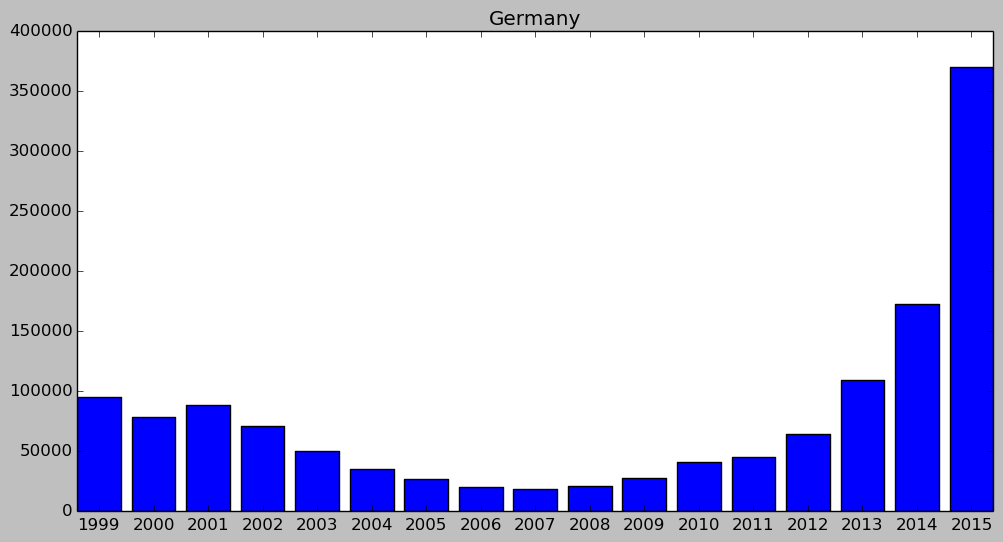

In [144]:
from pyspark.mllib.stat import Statistics
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

years = land.map(lambda r: r[0]).collect()
x_pos = np.arange(len(years))
y_pos = land.map(lambda r: r[1]).collect() 


fig = plt.figure(figsize=(26, 6))
ax1 = fig.add_subplot(121)
plt.xticks(x_pos, years)
plt.title(str(countryVar))
ax1.bar(x_pos, y_pos, align='center')

fig.show()

In [145]:
yearsSql = sqlContext.sql('SELECT DISTINCT _3 FROM allData GROUP BY _3 ORDER BY _3')

years = yearsSql.map(lambda r: r[0]).collect()

options2 = ''

for x in years:
    options2 += """<option value='""" + str(x) + """'>""" + str(x) + """</option>"""

In [150]:
from IPython.display import HTML

input_form = """
<style type="text/css">
.form-style-6{
    font: 105% Arial, Helvetica, sans-serif;
    max-width: 400px;
    padding: 16px;
    background: #F7F7F7;
}
.form-style-6 h1{
    background: #43D1AF;
    padding: 20px 0;
    font-size: 150%;
    font-weight: 300;
    text-align: center;
    color: #fff;
    margin: -16px 0px 16px 0px;
}
.form-style-6 input[type="text"],
.form-style-6 input[type="date"],
.form-style-6 input[type="datetime"],
.form-style-6 input[type="email"],
.form-style-6 input[type="number"],
.form-style-6 input[type="search"],
.form-style-6 input[type="time"],
.form-style-6 input[type="url"],
.form-style-6 textarea,
.form-style-6 select 
{
    -webkit-transition: all 0.30s ease-in-out;
    -moz-transition: all 0.30s ease-in-out;
    -ms-transition: all 0.30s ease-in-out;
    -o-transition: all 0.30s ease-in-out;
    outline: none;
    box-sizing: border-box;
    -webkit-box-sizing: border-box;
    -moz-box-sizing: border-box;
    width: 100%;
    background: #fff;
    margin-bottom: 4%;
    border: 1px solid #ccc;
    padding: 3%;
    color: #555;
    font: 95% Arial, Helvetica, sans-serif;
}
.form-style-6 input[type="text"]:focus,
.form-style-6 input[type="date"]:focus,
.form-style-6 input[type="datetime"]:focus,
.form-style-6 input[type="email"]:focus,
.form-style-6 input[type="number"]:focus,
.form-style-6 input[type="search"]:focus,
.form-style-6 input[type="time"]:focus,
.form-style-6 input[type="url"]:focus,
.form-style-6 textarea:focus,
.form-style-6 select:focus
{
    box-shadow: 0 0 5px #43D1AF;
    padding: 3%;
    border: 1px solid #43D1AF;
}

.form-style-6 input[type="submit"],
.form-style-6 input[type="button"]{
    box-sizing: border-box;
    -webkit-box-sizing: border-box;
    -moz-box-sizing: border-box;
    width: 100%;
    padding: 3%;
    background: #43D1AF;
    border-bottom: 2px solid #30C29E;
    border-top-style: none;
    border-right-style: none;
    border-left-style: none;    
    color: #fff;
}
.form-style-6 input[type="submit"]:hover,
.form-style-6 input[type="button"]:hover{
    background: #2EBC99;
}
</style>
<div class="form-style-6">
<h1>Pick a Year</h1>
<form>
<select id="var_value2">""" + options2 + """ </select><br><br>
<input type="button" value="Set Year" onclick="set_year()"/>
</form>
</div>
"""

javascript = """
<script type="text/Javascript">
    function set_year(){
        var var_value = document.getElementById('var_value2').value;
        var command = "yearVar = '" + var_value + "'";
        var kernel = IPython.notebook.kernel;
        kernel.execute(command);
        IPython.notebook.execute_cells_below();
    }
</script>
"""

HTML(input_form + javascript)

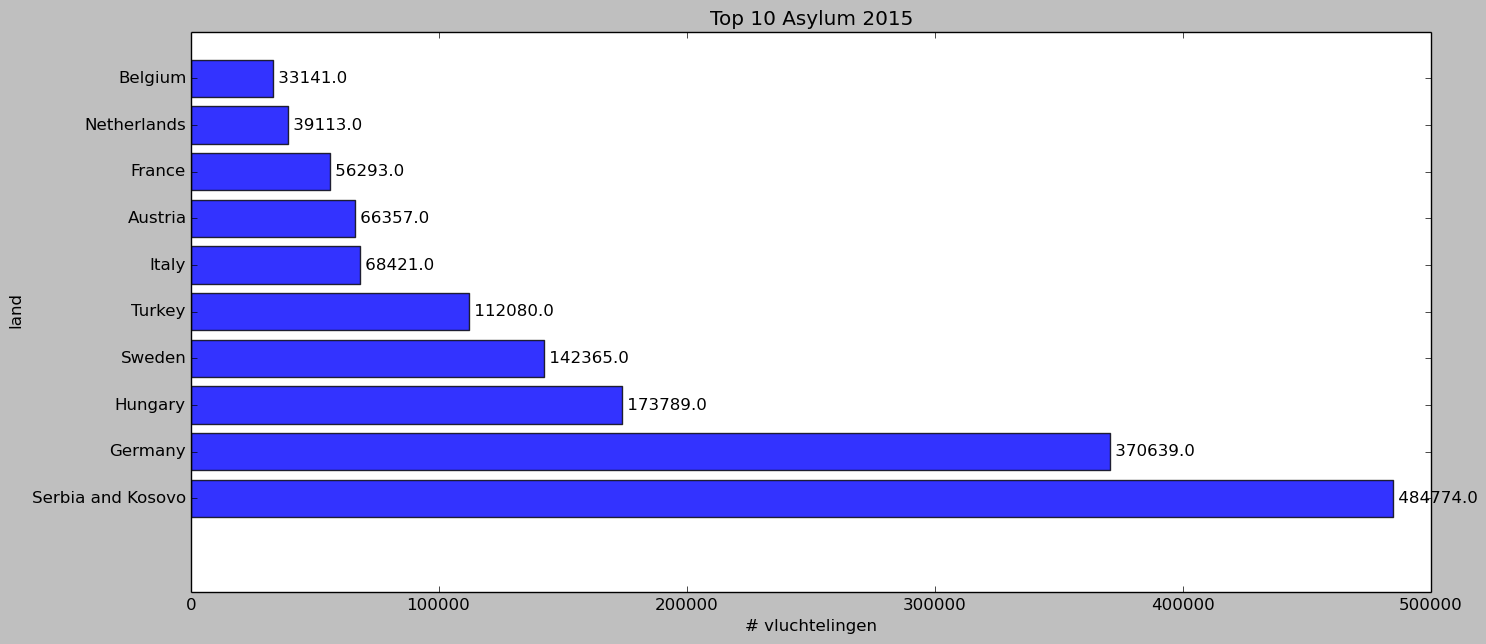

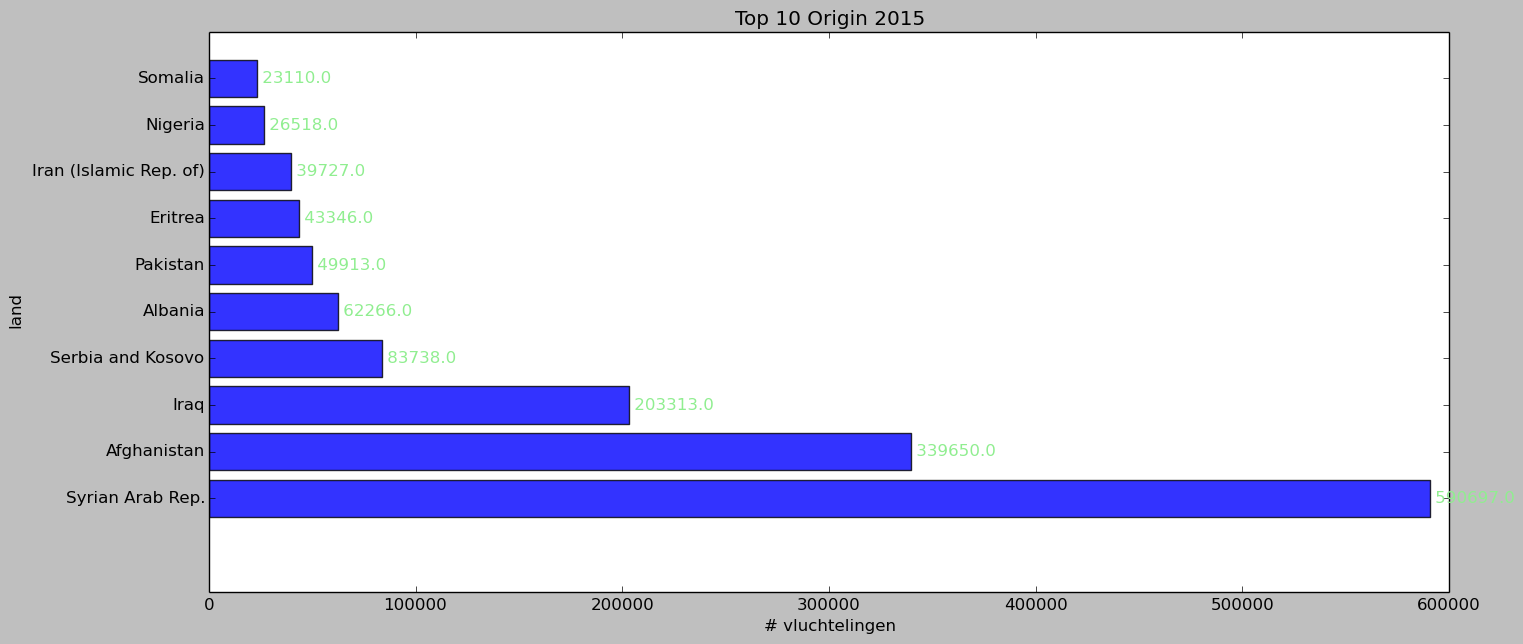

In [151]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np

top10 = sqlContext.sql('SELECT DISTINCT _1, sum(_5) AS totaal FROM allData WHERE _3="' + yearVar + '" GROUP BY _1 ORDER BY totaal DESC LIMIT 10 ')
#top10.show()

land = top10.map(lambda l: l[0]).collect()
y_pos = np.arange(len(land))
x_pos = top10.map(lambda l: l[1]).collect()

plt.figure(figsize=(16,7))
plt.barh(y_pos, x_pos, align='center', alpha=0.8)
plt.yticks(y_pos, land)
plt.xlabel('# vluchtelingen')
plt.ylabel('land')
plt.title('Top 10 Asylum ' + str(yearVar))


for x, y in zip(x_pos, y_pos):
    plt.text(x, y, " "+str(x), ha='left', va='center')
    
plt.show()


top10 = sqlContext.sql('SELECT DISTINCT (_2) as land, sum(_5) as totaal FROM allData WHERE (_3)=' + yearVar +' GROUP BY _2 ORDER BY totaal desc LIMIT 10')
#top10.show()

land = top10.map(lambda l: l[0]).collect()
y_pos = np.arange(len(land))
x_pos = top10.map(lambda l: l[1]).collect()

plt.figure(figsize=(16,7))
plt.barh(y_pos, x_pos, align='center', alpha=0.8)
plt.yticks(y_pos, land)
plt.xlabel('# vluchtelingen')
plt.ylabel('land')
plt.title('Top 10 Origin '+str(yearVar))

for x, y in zip(x_pos, y_pos):
    plt.text(x, y, " "+str(x), ha='left', color='lightgreen', va='center')

plt.show()


In [154]:
from IPython.display import HTML

input_form = """
<style type="text/css">
.form-style-6{
    font: 105% Arial, Helvetica, sans-serif;
    max-width: 400px;
    padding: 16px;
    background: #F7F7F7;
}
.form-style-6 h1{
    background: #43D1AF;
    padding: 20px 0;
    font-size: 150%;
    font-weight: 300;
    text-align: center;
    color: #fff;
    margin: -16px 0px 16px 0px;
}
.form-style-6 input[type="text"],
.form-style-6 input[type="date"],
.form-style-6 input[type="datetime"],
.form-style-6 input[type="email"],
.form-style-6 input[type="number"],
.form-style-6 input[type="search"],
.form-style-6 input[type="time"],
.form-style-6 input[type="url"],
.form-style-6 textarea,
.form-style-6 select 
{
    -webkit-transition: all 0.30s ease-in-out;
    -moz-transition: all 0.30s ease-in-out;
    -ms-transition: all 0.30s ease-in-out;
    -o-transition: all 0.30s ease-in-out;
    outline: none;
    box-sizing: border-box;
    -webkit-box-sizing: border-box;
    -moz-box-sizing: border-box;
    width: 100%;
    background: #fff;
    margin-bottom: 4%;
    border: 1px solid #ccc;
    padding: 3%;
    color: #555;
    font: 95% Arial, Helvetica, sans-serif;
}
.form-style-6 input[type="text"]:focus,
.form-style-6 input[type="date"]:focus,
.form-style-6 input[type="datetime"]:focus,
.form-style-6 input[type="email"]:focus,
.form-style-6 input[type="number"]:focus,
.form-style-6 input[type="search"]:focus,
.form-style-6 input[type="time"]:focus,
.form-style-6 input[type="url"]:focus,
.form-style-6 textarea:focus,
.form-style-6 select:focus
{
    box-shadow: 0 0 5px #43D1AF;
    padding: 3%;
    border: 1px solid #43D1AF;
}

.form-style-6 input[type="submit"],
.form-style-6 input[type="button"]{
    box-sizing: border-box;
    -webkit-box-sizing: border-box;
    -moz-box-sizing: border-box;
    width: 100%;
    padding: 3%;
    background: #43D1AF;
    border-bottom: 2px solid #30C29E;
    border-top-style: none;
    border-right-style: none;
    border-left-style: none;    
    color: #fff;
}
.form-style-6 input[type="submit"]:hover,
.form-style-6 input[type="button"]:hover{
    background: #2EBC99;
}
</style>
<div class="form-style-6">
<h1>Pick 4 Countries</h1>
<form>
Country 1: <select id="var_value3">""" + options + """ </select><br><br>
Country 2: <select id="var_value4">""" + options + """ </select><br><br>
Country 3: <select id="var_value5">""" + options + """ </select><br><br>
Country 4: <select id="var_value6">""" + options + """ </select><br><br>
<input type="button" value="Set Countries" onclick="set_value1()"/>
</form>
</div>
"""

javascript = """
<script type="text/Javascript">
    function set_value1(){
        var value3 = document.getElementById('var_value3').value;
        var value4 = document.getElementById('var_value4').value;
        var value5 = document.getElementById('var_value5').value;
        var value6 = document.getElementById('var_value6').value;
        var command1 = "countryVar1 = '" + value3 + "'";
        var command2 = "countryVar2 = '" + value4 + "'";
        var command3 = "countryVar3 = '" + value5 + "'";
        var command4 = "countryVar4 = '" + value6 + "'";
        var kernel = IPython.notebook.kernel;
        kernel.execute(command1);
        kernel.execute(command2);
        kernel.execute(command3);
        kernel.execute(command4);
        IPython.notebook.execute_cells_below();
    }
</script>
"""

HTML(input_form + javascript)

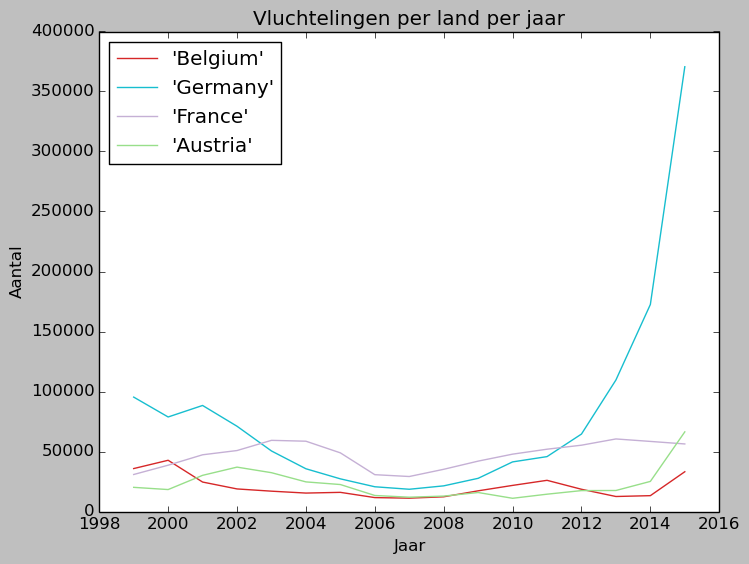

In [155]:
land1 = sqlContext.sql('SELECT (_3) as year, sum(_5) as totaal FROM allData WHERE (_1)= "' + str(countryVar1) +'"  GROUP BY (_1),(_3) ORDER BY year')
land2 = sqlContext.sql('SELECT (_3) as year, sum(_5) as totaal FROM allData WHERE (_1)= "' + str(countryVar2) +'"  GROUP BY (_1),(_3) ORDER BY year')
land3 = sqlContext.sql('SELECT (_3) as year, sum(_5) as totaal FROM allData WHERE (_1)= "' + str(countryVar3) +'"  GROUP BY (_1),(_3) ORDER BY year')
land4 = sqlContext.sql('SELECT (_3) as year, sum(_5) as totaal FROM allData WHERE (_1)= "' + str(countryVar4) +'"  GROUP BY (_1),(_3) ORDER BY year')

land1_radius = land1.map(lambda l: l[0]).collect()
land1_area = land1.map(lambda l: l[1]).collect()

land2_radius = land2.map(lambda l: l[0]).collect()
land2_area = land2.map(lambda l: l[1]).collect()

land3_radius = land3.map(lambda l: l[0]).collect()
land3_area = land3.map(lambda l: l[1]).collect()

land4_radius = land4.map(lambda l: l[0]).collect()
land4_area = land4.map(lambda l: l[1]).collect()

plot1, = plt.plot(land1_radius, land1_area, '#d62728')
plot2, = plt.plot(land2_radius, land2_area, '#17becf')
plot3, = plt.plot(land3_radius, land3_area, '#c5b0d5')
plot4, = plt.plot(land4_radius, land4_area, '#98df8a')

plt.legend([plot1, plot2, plot3, plot4], ("'"+ str(countryVar1)+"'", "'"+ str(countryVar2)+ "'","'"+ str(countryVar3)+"'", "'"+ str(countryVar4)+"'"), 'best', numpoints=1)
plt.xlabel('Jaar')
plt.ylabel('Aantal')
plt.title('Vluchtelingen per land per jaar')


plt.show()